In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# dogs
dogs_df = pd.read_csv('normalized data/dogs/nd_avg.csv', index_col=[0])
dogs_df = dogs_df[dogs_df.columns.drop(list(dogs_df.filter(regex='breed_')))]
dogs_df = dogs_df.drop(columns=["Unnamed: 0"])
dogs_df.head()

,intake_number,time_in_shelter_days,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake,mixed_breed,dog_size,avg_height,avg_weight,avg_lifespan,...,in_month_5,in_month_6,in_month_7,in_month_8,in_month_9,in_month_10,in_month_11,in_month_12,is_puppy,age_upon_intake_days
0,0.0,49.747917,1,0,1.00000,1,0.5,0.038462,0.114427,0.777778,...,0,0,0,0,0,1,0,0,0,1.0
1,0.0,9.020139,1,0,1.00000,0,0.0,0.000000,0.000000,0.777778,...,0,0,0,0,1,0,0,0,0,1.0
2,0.0,23.104861,1,0,1.00000,1,1.0,0.576923,0.369608,0.444444,...,0,0,0,0,0,1,0,0,0,1.0
3,0.0,89.855556,1,0,1.00000,1,1.0,0.634615,0.472175,0.555556,...,0,0,0,1,0,0,0,0,0,1.0
4,0.0,2.755556,1,0,0.61831,1,1.0,0.692308,0.325557,0.777778,...,0,0,0,0,0,0,1,0,0,1.0


In [7]:
# cats
cats_df = pd.read_csv('normalized data/cats/nc_m1_ag2_h1.csv', index_col=[0])
cats_df.head()

,intake_number,time_in_shelter_days,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake,condition_Aged,condition_Feral,condition_Injured,condition_Normal,condition_Nursing,...,in_month_7,in_month_8,in_month_9,in_month_10,in_month_11,in_month_12,hair_length_Longhair,hair_length_Medium Hair,hair_length_Shorthair,is_kitten
0,0.000000,5.071528,1,0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0.333333,37.138889,1,0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.000000,174.189583,1,0,1.0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0.333333,8.065972,1,0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,21.161806,1,0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
def plot_animal_tisd_bars_c_t_r(animal_tisd, bins): # animal time in shelter in days    
    data = {}
    for animal, tisd in animal_tisd.items():
        animal_hist, _ = np.histogram(tisd, bins)
        animal_hist_t_pc = np.around(animal_hist / len(tisd) * 100, 2)
        animal_hist_r_pc = np.around(animal_hist / np.sum(animal_hist) * 100, 2)
        data[animal] = (animal_hist, animal_hist_t_pc, animal_hist_r_pc) 
        
    n_bins = len(bins)

    class_names = []
    for i in range(n_bins - 1):
        class_name = f'{bins[i]}-{bins[i+1]} days' if i != n_bins - 2 else f'> {bins[i]} days'
        class_names.append(class_name)

    x = np.arange(len(class_names))  # the label locations
    width = 0.3  # the width of the bars
    multiplier = 0
    multiplier_step = 1.25 # add space between grouped bars - 1 is base

    plt.rcParams["figure.figsize"] = (14, 7)

    fig, ax = plt.subplots(constrained_layout=True)

    for animal, (counts, t_percents, r_percents) in data.items():
        offset = width * multiplier
        rects = ax.barh(x + offset, counts, width, label=f'{animal} ({len(animal_tisd[animal])})')
        bar_labels = [f'C: {count} - T: {t_pc}% - R: {r_pc}%' for count, t_pc, r_pc  in zip(counts, t_percents, r_percents)]
        ax.bar_label(rects, bar_labels, padding=5)
        multiplier += multiplier_step

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title('Animal frequency by length of stay (classification period)')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Length of stay')
    yticks_pos = x if len(animal_tisd) == 1 else x + width*multiplier_step/2
    ax.set_yticks(yticks_pos, class_names)
    ax.legend(loc='upper right', prop={'size': 12})
    plt.plot()

In [66]:
def plot_animal_tisd_bars_c_t(animal_tisd, bins): # animal time in shelter in days    
    data = {}
    for animal, tisd in animal_tisd.items():
        animal_hist, _ = np.histogram(tisd, bins)
        animal_hist_t_pc = np.around(animal_hist / len(tisd) * 100, 2)
        data[animal] = (animal_hist, animal_hist_t_pc) 
        
    n_bins = len(bins)

    class_names = []
    for i in range(n_bins - 1):
        class_name = f'{bins[i]}-{bins[i+1]} days' if i != n_bins - 2 else f'> {bins[i]} days'
        class_names.append(class_name)

    x = np.arange(len(class_names))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    multiplier_step = 1.25 # add space between grouped bars - 1 is base
    
    plt.rcParams["figure.figsize"] = (14, 5)

    fig, ax = plt.subplots(constrained_layout=True)

    for animal, (counts, t_percents) in data.items():
        offset = width * multiplier
        rects = ax.barh(x + offset, counts, width, label=f'{animal} ({len(animal_tisd[animal])})')
        bar_labels = [f'{count} ({t_pc}%)' for count, t_pc in zip(counts, t_percents)]
        ax.bar_label(rects, bar_labels, padding=5)
        multiplier += multiplier_step

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title('Dog frequency by length of stay (classification period)')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Length of stay')
    yticks_pos = x if len(animal_tisd) == 1 else x + width*multiplier_step/2
    ax.set_yticks(yticks_pos, class_names)
    ax.legend(loc='upper right', prop={'size': 12})
    ax.set_xlim((0, 11500))
    plt.plot()

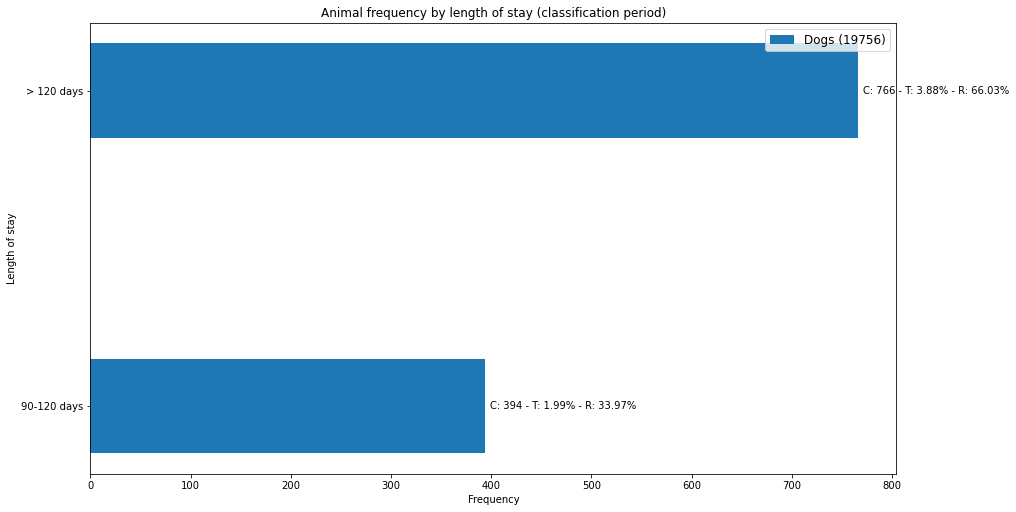

In [73]:
# notice how imbalanced dataset is by our goal label

animal_tisd = {'Dogs': dogs_df['time_in_shelter_days'], 'Cats': cats_df['time_in_shelter_days']}
bins = (0, 7, 30, 60, 90, 120, 5000)

animal_tisd = {'Dogs': dogs_df['time_in_shelter_days']}
bins = (90, 120, 5000)


plot_animal_tisd_bars_c_t_r(animal_tisd, bins)